https://365datascience.com/tutorials/python-tutorials/linear-regression/

Uses Statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [4]:
y = data['GPA']
x1 = data['SAT']

In [5]:
x1

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

Text(0, 0.5, 'GPA')

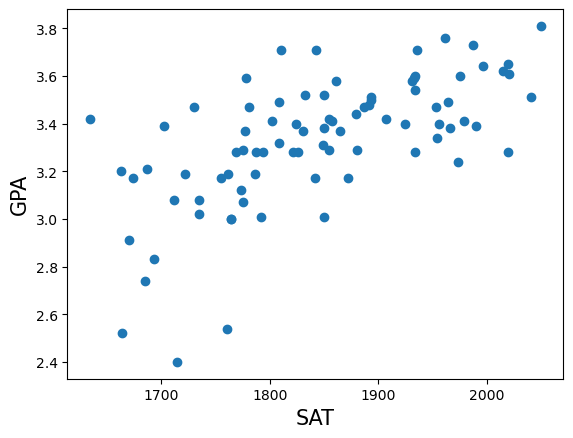

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=15)
plt.ylabel('GPA', fontsize=15)

In [7]:
x = sm.add_constant(x1)

In [8]:
x

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [9]:
results = sm.OLS(y, x).fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           7.20e-11
Time:                        10:45:45   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
0.275 - 1.96*0.409

-0.5266399999999999

Text(0, 0.5, 'GPA')

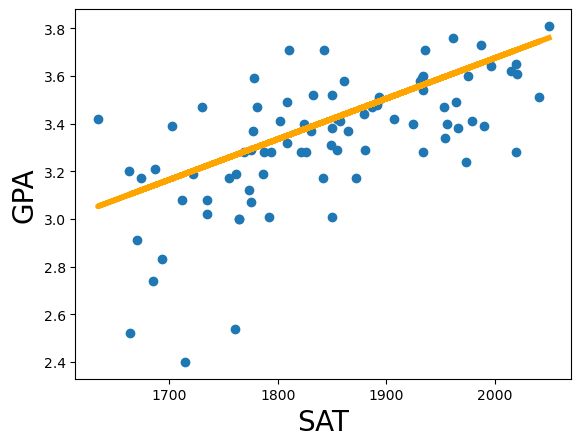

In [12]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275

fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

In [13]:
results.conf_int()

,0,1
const,-0.538073,1.088153
SAT,0.001216,0.002096


In [14]:
results.predict([1, 1850])

array([3.33806319])

In [15]:
prediction = results.get_prediction([1, 1850])

In [16]:
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.338063,0.023003,3.292302,3.383824,2.916599,3.759527


# Toy Problem

In [47]:
x = np.random.uniform(0.5,10,500) 
y = 2.544 + 0.164*x  + np.random.normal(0,0.1,500) 

Text(0, 0.5, 'y')

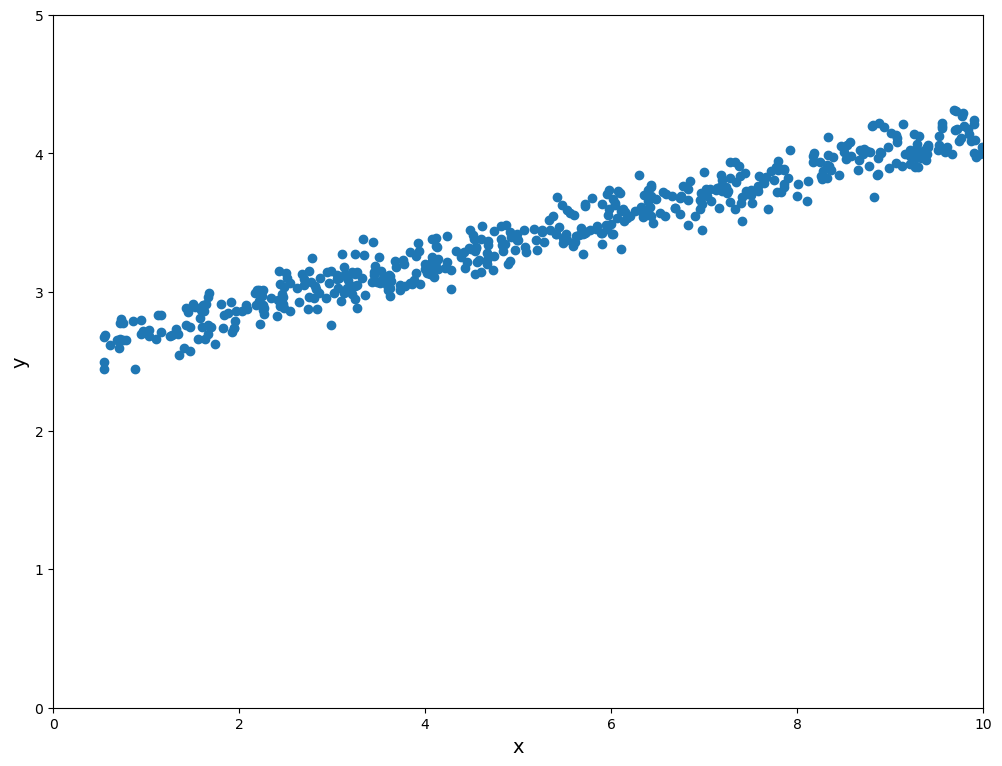

In [48]:
plt.scatter(x, y)
plt.xlim([0, 10])
plt.ylim([0, 5])
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

In [49]:
x = sm.add_constant(x)

In [50]:
results = sm.OLS(y, x).fit()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     8860.
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          2.26e-319
Time:                        10:53:41   Log-Likelihood:                 432.21
No. Observations:                 500   AIC:                            -860.4
Df Residuals:                     498   BIC:                            -852.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5517      0.010    246.448      0.000       2.531       2.572
x1             0.1630      0.002     94.126      0.000       0.160       0.166
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.933
Skew:                           0.032   Prob(JB):                        0.627
Kurtosis:                       2.798   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results.get_prediction([1, 4.5]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3.285036,0.004808,3.275589,3.294482,3.084123,3.485949


See this for a discussion on finding confidence intervals:
https://www.youtube.com/watch?v=8w6EPyEqE9M&t=322s using t-statistic

In [23]:
import scipy


In [24]:
scipy.stats.t.ppf(q=1-0.025, df=498)

1.9647389829672648

### Confidence intervals vs prediction intervals

https://towardsdatascience.com/confidence-intervals-vs-prediction-intervals-7b296ae58745

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [26]:
X = pd.DataFrame(housing["data"][:200, 0], columns=[housing["feature_names"][0]])
X = sm.add_constant(X)
y = pd.DataFrame(housing["target"][:200], columns=housing["target_names"])

In [27]:
mod = sm.OLS(y[1:], X[1:])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     329.8
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           6.01e-44
Time:                        10:45:46   Log-Likelihood:                -181.83
No. Observations:                 199   AIC:                             367.7
Df Residuals:                     197   BIC:                             374.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7548      0.078      9.633      0.0

In [28]:
pred = res.get_prediction(X[:1]).summary_frame(alpha=0.05)
print(pred)

      mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  3.92956  0.117469       3.697902       4.161218      2.711407      5.147713


In [29]:
res.resid.sample(1)

163    0.203394
dtype: float64

## Example of gradient descent

https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [31]:
data = pd.read_csv('linreg_data.csv', header=None)

In [32]:
X = data[0]
Y = data[1]

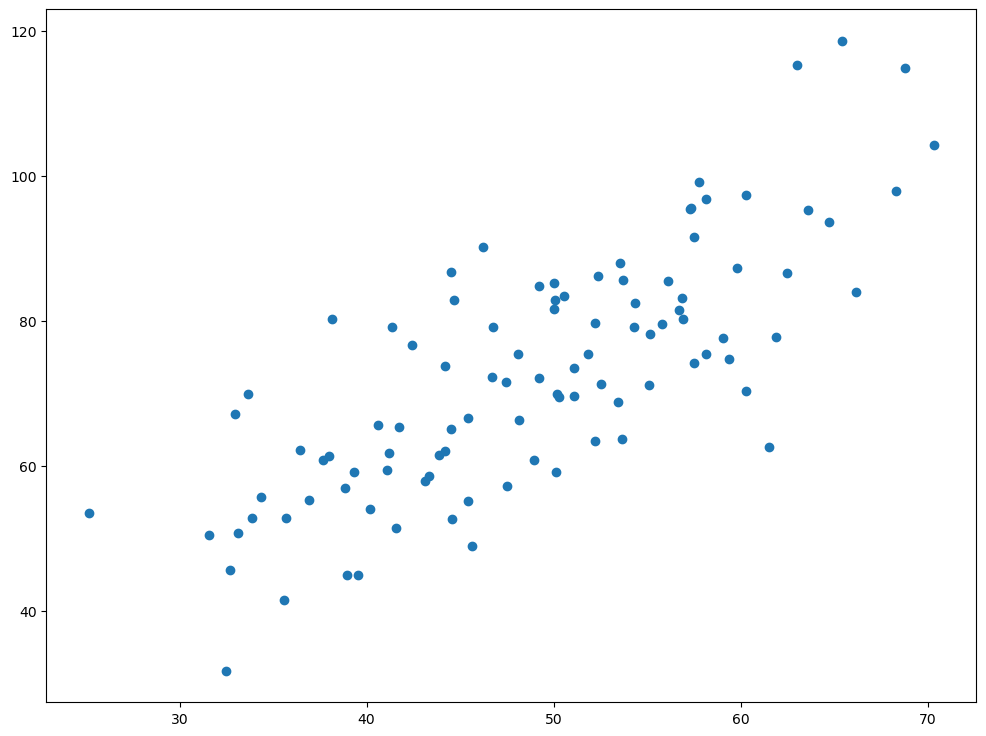

In [33]:
plt.scatter(X, Y)

In [34]:
X = sm.add_constant(X)

In [35]:
X

,const,0
0,1.0,32.502345
1,1.0,53.426804
2,1.0,61.530358
3,1.0,47.475640
4,1.0,59.813208
...,...,...
95,1.0,50.030174
96,1.0,49.239765
97,1.0,50.039576
98,1.0,48.149859


In [36]:
results = sm.OLS(Y, X).fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      1   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           3.86e-21
Time:                        10:45:46   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9910      5.459      1.464      0.146      -2.842      18.824
0              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Building the model
m = 0.1
c = 3

L = 0.0001  # The learning Rate
epochs = 40000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
data.columns = ['X', 'Y']

In [ ]:
data['X - Xbar'] = data['X'] - data['X'].mean()
data['Y - Ybar'] = data['Y'] - data['Y'].mean()

In [ ]:
data['X - Xbar'] = data['X'] - data['X'].mean()
data['Y - Ybar'] = data['Y'] - data['Y'].mean()

In [ ]:
data['(X-Xbar)^2'] = data['X - Xbar']*data['X - Xbar']

In [ ]:
DR = data['(X-Xbar)^2'].sum()

In [ ]:
NR = (data['X - Xbar']*data['Y - Ybar']).sum()

In [ ]:
NR

In [ ]:
a = NR/DR

In [ ]:
b =  data['Y'].mean() - a*data['X'].mean()

In [ ]:
b

In [ ]:
Y_PRED = a*data['X'] + b

In [ ]:
plt.scatter(data['X'], data['Y'])
plt.scatter(data['X'], Y_PRED)

In [ ]:
a = 1.39#4796491688889395
b = 4.3#0.10148121494753726

Y_PRED = a*data['X'] + b

plt.scatter(data['X'], data['Y'])
plt.scatter(data['X'], Y_PRED)

In [ ]:
7.9/1.32

In [ ]:
1.47/0.101

In [53]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

X1 = np.random.rand(200)*3.1
X2 = np.random.rand(200)*4.1
X3 = np.random.rand(200)*5.9
X4 = np.random.rand(200)*2.6
X5 = np.random.rand(200)*5.3
Y0 = 0.58*X1 - 0.97*X2 + 0.93*X3 - 2.3
err = np.random.randn(200)

df = pd.DataFrame(dict(X1=X1, X2=X2, X3=X3, X4=X4, X5=X5, Y=Y0+err))
model = sm.OLS(df["Y"], sm.add_constant(df[["X1","X2","X3","X4","X5"]]), missing="drop").fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.822   
Dependent Variable: Y                AIC:                548.4153
Date:               2024-02-27 13:56 BIC:                568.2053
No. Observations:   200              Log-Likelihood:     -268.21 
Df Model:           5                F-statistic:        185.2   
Df Residuals:       194              Prob (F-statistic): 7.81e-72
R-squared:          0.827            Scale:              0.88220 
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.4342     0.2690    -9.0480   0.0000   -2.9649   -1.9036
X1        0.6342     0.0715     8.8742   0.0000    0.4932    0.7751
X2       -1.0877     0.0556   -19.5702   0.0000   -1.1973   -0.9780
X3        0.9542     0.0413    23.1259   0.0000    0.8728    1.0356
X4        0.0